In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### LOADING DATA

In [2]:
# Load the data
data = pd.read_csv('../data/feature_engineered.csv')

### MODEL BUILDING

**Steps involved in the Model Building**
* Setting up features and target as X and y
* Splitting the testing and training sets
* Build a pipeline of model for four different classifiers.
  1. Naïve Bayes
  2. RandomForestClassifier
  3. KNeighborsClassifier
  4. Support Vector Machines
* Fit all the models on training data
* Get the cross-validation on the training set for all the models for accuracy

In [3]:
# Prepare the features and target variable
X = data[['No_of_Words', 'No_of_Characters', 'No_of_sentence']]
y = data['Target']

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Testing on the following classifiers
classifiers = [MultinomialNB(), 
               RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "NaiveBayes", 1: "RandomForest", 2: "KNeighbours",3: "SVC"}

In [5]:
# Cossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.863903 
RandomForest: 0.931724 
KNeighbours: 0.923389 
SVC: 0.921811 


### EVALUATING MODELS
**Testing the models on Testset**
* Accuracy Report
* Confusion Matrix

In [6]:
# Model Evaluation
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)


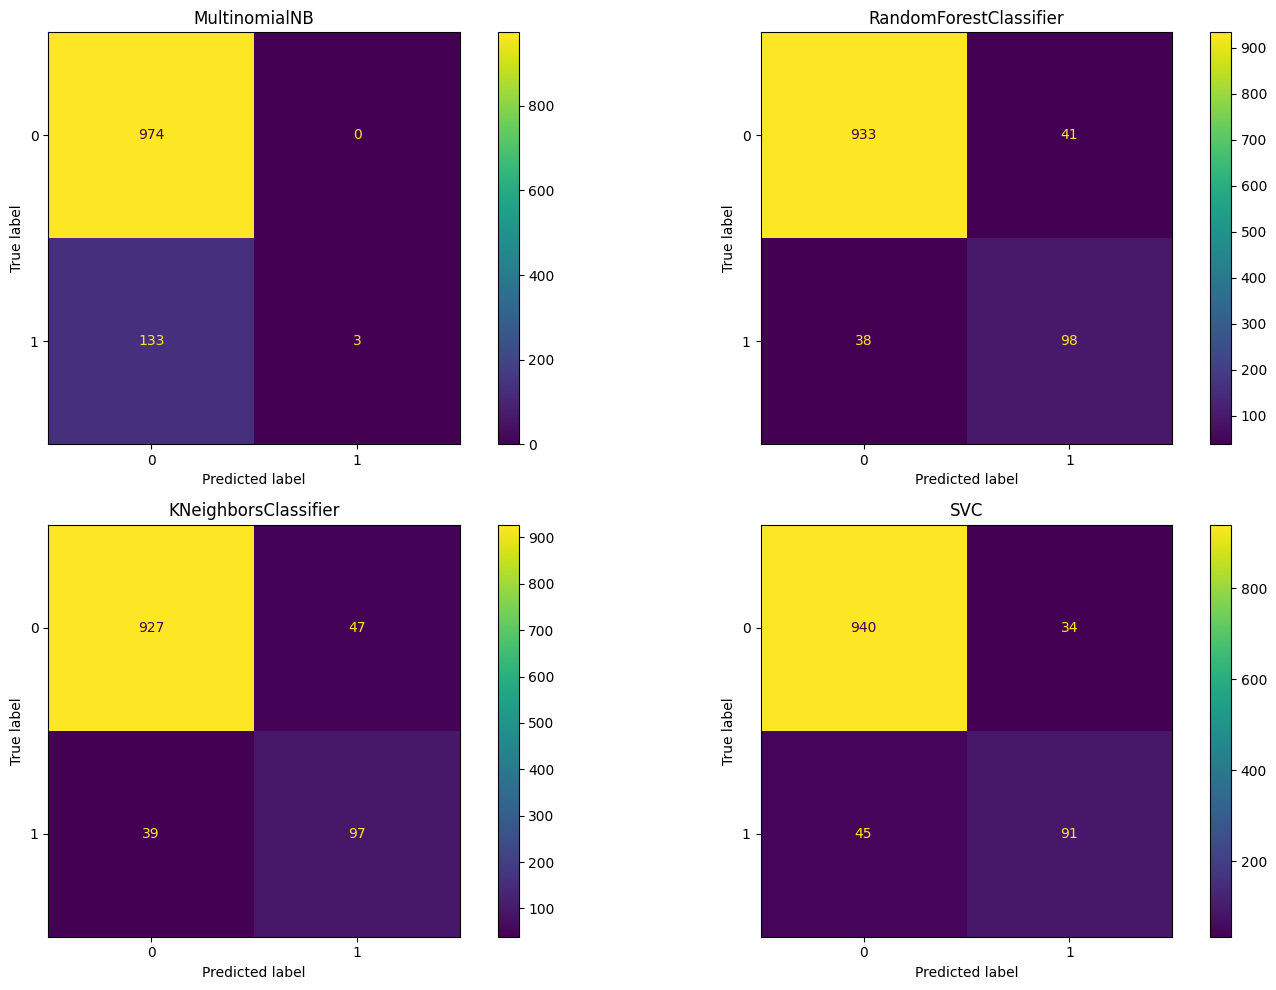

In [7]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for cls, ax in zip(classifiers, axes.flatten()):
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, cls.predict(X_test))
    
    # Create the ConfusionMatrixDisplay instance
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
    
    # Plot it on the specified axes
    disp.plot(ax=ax)
    
    # Set the classifier name as the title
    ax.title.set_text(type(cls).__name__)

plt.tight_layout()
plt.show()
